# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [4]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytest-7.1.1-py3-none-any.whl (297 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


Important! After you have ran pip install, please restart the kernel using the **Kernel** menu 

In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended. 

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [2]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 7.68s ========================


You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ``` 
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
> 
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> **Answer**: 

In order to resize the image , I have used .REsize method of torch, which is basically done by Bilinear interpolation. It resize the RGB image to 256 * 256 size, After that I croppped the image to 224* 224 using RandomCrop Method, In Random cropping, the image is cropped randomy to the desire size and not from a particular area, this brings peculiarity to the training data and nthe model is trained more robustly. The reason for 224 is that From the network's perspective, it expects input of size (224, 224), no matter how the input is transformed.

I have also added Augmentation using Horizontal and Vertical Flip to ensure better data for training

### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [3]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

======================= 1 passed, 3 deselected in 6.51s ========================


We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

In [4]:
#!pip install pytest
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


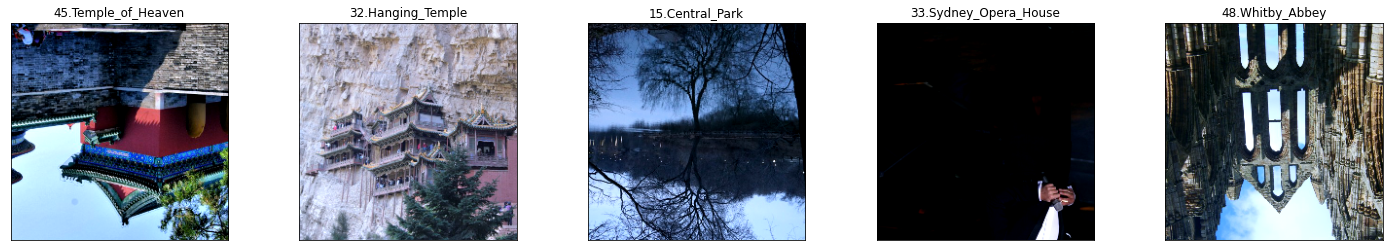

In [9]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(batch_size = 5, valid_size = 0.01, num_workers = 0)

visualize_one_batch(data_loaders)

## Step 2: Define model
Open src/model.py and complete the MyModel class filling in all the YOUR CODE HERE sections. After you're done, execute the following test and make sure it passes:



In [13]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 11.32s ==============================


In [14]:
print(model)

NameError: name 'model' is not defined

Question: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.


>Answer: I applied 5 layers of convolution and MaxPooling, resulting at the end 256 feature maps of 7x7 dimension. More layers are needed to get enough accuracy for such a complex dataset. I applied Batch Normalization at each layer, except the first one, to enhance the model performance. Then I flattened the output feature maps in order to feed that to the model head. The model head is composed by 3 fully connected layers with dropout, to output the scores for the number of image classes.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [15]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 1.98s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [16]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 1.88s ========================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [8]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

================= 1 passed, 3 deselected in 140.25s (0:02:20) ==================


Now complete the `valid` function, then run the tests:

In [8]:
!pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

======================= 1 passed, 3 deselected in 55.10s =======================


Now complete the `optimize` function, then run the tests:

In [11]:
!pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

================= 1 passed, 3 deselected in 913.16s (0:15:13) ==================


Finally, complete the `test` function then run the tests:

In [12]:
!pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

================= 1 passed, 3 deselected in 387.60s (0:06:27) ==================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [17]:
batch_size = 32        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 100        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.1          # dropout for our model
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'           # optimizer. 'sgd' or 'adam'
weight_decay = 0.005     # regularization. Increase this to combat overfitting
num_workers = 8

In [ ]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size = batch_size, valid_size = valid_size,num_workers = num_workers)#change made

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(num_classes = num_classes, dropout = dropout)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model = model,learning_rate = learning_rate, optimizer = opt, weight_decay = weight_decay)

# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=False
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.50it/s]

both loss calculated
Epoch: 1 	Training Loss: 4.724837 	Validation Loss: 4.019949



Testing: 100%|██████████████████████████████████| 40/40 [00:27<00:00,  1.48it/s]


Test Loss: 3.860074


Test Accuracy:  4% (50/1250)
New minimum validation loss: 4.019949. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [00:22<00:00,  1.44it/s]

both loss calculated
Epoch: 2 	Training Loss: 3.871555 	Validation Loss: 3.866267



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.50it/s]


Test Loss: 3.820208


Test Accuracy:  3% (43/1250)
New minimum validation loss: 3.866267. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.47it/s]

both loss calculated
Epoch: 3 	Training Loss: 3.852427 	Validation Loss: 3.888675



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.51it/s]

Test Loss: 3.819465


Test Accuracy:  4% (54/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.48it/s]

both loss calculated
Epoch: 4 	Training Loss: 3.834599 	Validation Loss: 4.000363



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.52it/s]

Test Loss: 3.841136


Test Accuracy:  3% (49/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]

both loss calculated
Epoch: 5 	Training Loss: 3.799145 	Validation Loss: 3.925503



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.49it/s]

Test Loss: 3.918155


Test Accuracy:  4% (51/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:22<00:00,  1.42it/s]

both loss calculated
Epoch: 6 	Training Loss: 3.734455 	Validation Loss: 3.815477



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.50it/s]


Test Loss: 3.725698


Test Accuracy:  6% (77/1250)
New minimum validation loss: 3.815477. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.53it/s]

both loss calculated
Epoch: 7 	Training Loss: 3.703857 	Validation Loss: 3.939541



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 3.758473


Test Accuracy:  5% (73/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 8 	Training Loss: 3.687240 	Validation Loss: 3.829365



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]

Test Loss: 3.626817


Test Accuracy:  7% (95/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.51it/s]

both loss calculated
Epoch: 9 	Training Loss: 3.639093 	Validation Loss: 4.494958



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.53it/s]

Test Loss: 3.602280


Test Accuracy: 10% (137/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.55it/s]

both loss calculated
Epoch: 10 	Training Loss: 3.577102 	Validation Loss: 4.018119



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.61it/s]

Test Loss: 3.530595


Test Accuracy: 10% (134/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.60it/s]

both loss calculated
Epoch: 11 	Training Loss: 3.553362 	Validation Loss: 3.930601



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.60it/s]

Test Loss: 3.500309


Test Accuracy: 10% (136/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.55it/s]

both loss calculated
Epoch: 12 	Training Loss: 3.510786 	Validation Loss: 4.616278



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]

Test Loss: 3.492462


Test Accuracy:  9% (124/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.55it/s]

both loss calculated
Epoch: 13 	Training Loss: 3.435986 	Validation Loss: 4.458547



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.60it/s]

Test Loss: 3.393798


Test Accuracy: 14% (182/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.57it/s]

both loss calculated
Epoch: 14 	Training Loss: 3.396996 	Validation Loss: 4.487744



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]

Test Loss: 3.347512


Test Accuracy: 13% (168/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]

both loss calculated
Epoch: 15 	Training Loss: 3.351003 	Validation Loss: 4.212913



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.57it/s]

Test Loss: 3.257286


Test Accuracy: 15% (196/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 16 	Training Loss: 3.284558 	Validation Loss: 4.406131



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 3.217771


Test Accuracy: 15% (193/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.52it/s]

both loss calculated
Epoch: 17 	Training Loss: 3.241681 	Validation Loss: 4.458157



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.61it/s]

Test Loss: 3.244421


Test Accuracy: 14% (182/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.58it/s]

both loss calculated
Epoch: 18 	Training Loss: 3.208448 	Validation Loss: 4.692737



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]

Test Loss: 3.194740


Test Accuracy: 15% (199/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.53it/s]

both loss calculated
Epoch: 19 	Training Loss: 3.113763 	Validation Loss: 4.643678



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 3.043925


Test Accuracy: 21% (264/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.59it/s]

both loss calculated
Epoch: 20 	Training Loss: 3.067238 	Validation Loss: 4.842223



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 2.981676


Test Accuracy: 22% (281/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]

both loss calculated
Epoch: 21 	Training Loss: 3.020051 	Validation Loss: 4.545417



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.51it/s]

Test Loss: 3.031991


Test Accuracy: 21% (271/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 22 	Training Loss: 2.953157 	Validation Loss: 5.110164



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.63it/s]

Test Loss: 2.975907


Test Accuracy: 21% (271/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.59it/s]

both loss calculated
Epoch: 23 	Training Loss: 2.923239 	Validation Loss: 4.381280



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.61it/s]

Test Loss: 2.921138


Test Accuracy: 21% (270/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.50it/s]

both loss calculated
Epoch: 24 	Training Loss: 2.864228 	Validation Loss: 3.984149



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 2.795562


Test Accuracy: 27% (340/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 25 	Training Loss: 2.789439 	Validation Loss: 4.651683



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.60it/s]

Test Loss: 2.789620


Test Accuracy: 28% (358/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.58it/s]

both loss calculated
Epoch: 26 	Training Loss: 2.744873 	Validation Loss: 4.374528



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.61it/s]

Test Loss: 2.692523


Test Accuracy: 29% (371/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.57it/s]

both loss calculated
Epoch: 27 	Training Loss: 2.706880 	Validation Loss: 4.030594



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.62it/s]

Test Loss: 2.751852


Test Accuracy: 27% (340/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.53it/s]

both loss calculated
Epoch: 28 	Training Loss: 2.635497 	Validation Loss: 4.180123



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.50it/s]

Test Loss: 2.625734


Test Accuracy: 32% (402/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.55it/s]

both loss calculated
Epoch: 29 	Training Loss: 2.607281 	Validation Loss: 4.143656



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.54it/s]

Test Loss: 2.660372


Test Accuracy: 30% (385/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.57it/s]

both loss calculated
Epoch: 30 	Training Loss: 2.571622 	Validation Loss: 4.058167



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.57it/s]

Test Loss: 2.579974


Test Accuracy: 32% (407/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.50it/s]

both loss calculated
Epoch: 31 	Training Loss: 2.539482 	Validation Loss: 4.284365



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.54it/s]

Test Loss: 2.523447


Test Accuracy: 32% (407/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.50it/s]

both loss calculated
Epoch: 32 	Training Loss: 2.518545 	Validation Loss: 3.858928



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]

Test Loss: 2.499913


Test Accuracy: 34% (436/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.48it/s]

both loss calculated
Epoch: 33 	Training Loss: 2.491612 	Validation Loss: 3.938130



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 2.513978


Test Accuracy: 32% (411/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.51it/s]

both loss calculated
Epoch: 34 	Training Loss: 2.431212 	Validation Loss: 4.026253



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 2.483125


Test Accuracy: 34% (427/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.48it/s]

both loss calculated
Epoch: 35 	Training Loss: 2.407434 	Validation Loss: 3.985380



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.53it/s]

Test Loss: 2.454152


Test Accuracy: 36% (454/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.47it/s]

both loss calculated
Epoch: 36 	Training Loss: 2.374058 	Validation Loss: 4.168869



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.54it/s]

Test Loss: 2.406571


Test Accuracy: 35% (448/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.55it/s]

both loss calculated
Epoch: 37 	Training Loss: 2.350501 	Validation Loss: 4.069208



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.54it/s]

Test Loss: 2.381799


Test Accuracy: 38% (487/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.48it/s]

both loss calculated
Epoch: 38 	Training Loss: 2.317011 	Validation Loss: 4.270443



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.55it/s]

Test Loss: 2.354141


Test Accuracy: 39% (491/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.55it/s]

both loss calculated
Epoch: 39 	Training Loss: 2.306807 	Validation Loss: 4.364435



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.56it/s]

Test Loss: 2.348138


Test Accuracy: 39% (493/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.46it/s]

both loss calculated
Epoch: 40 	Training Loss: 2.266072 	Validation Loss: 4.103130



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.54it/s]

Test Loss: 2.344024


Test Accuracy: 37% (470/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.48it/s]

both loss calculated
Epoch: 41 	Training Loss: 2.241624 	Validation Loss: 4.027190



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.57it/s]

Test Loss: 2.341413


Test Accuracy: 39% (489/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]

both loss calculated
Epoch: 42 	Training Loss: 2.246020 	Validation Loss: 4.075456



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.54it/s]

Test Loss: 2.340877


Test Accuracy: 37% (466/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.49it/s]

both loss calculated
Epoch: 43 	Training Loss: 2.208512 	Validation Loss: 4.421003



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.53it/s]

Test Loss: 2.260204


Test Accuracy: 41% (516/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.51it/s]

both loss calculated
Epoch: 44 	Training Loss: 2.187327 	Validation Loss: 4.173681



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.57it/s]

Test Loss: 2.312199


Test Accuracy: 40% (505/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.54it/s]

both loss calculated
Epoch: 45 	Training Loss: 2.190467 	Validation Loss: 4.109358



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]

Test Loss: 2.249689


Test Accuracy: 41% (515/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.50it/s]

both loss calculated
Epoch: 46 	Training Loss: 2.151542 	Validation Loss: 4.222943



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.53it/s]

Test Loss: 2.232170


Test Accuracy: 41% (519/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 47 	Training Loss: 2.148604 	Validation Loss: 4.104224



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]

Test Loss: 2.248012


Test Accuracy: 40% (506/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.53it/s]

both loss calculated
Epoch: 48 	Training Loss: 2.131826 	Validation Loss: 4.134500



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.60it/s]

Test Loss: 2.263237


Test Accuracy: 40% (506/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.50it/s]

both loss calculated
Epoch: 49 	Training Loss: 2.108313 	Validation Loss: 3.998706



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.49it/s]

Test Loss: 2.222109


Test Accuracy: 43% (542/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 50 	Training Loss: 2.114657 	Validation Loss: 4.054122



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.57it/s]

Test Loss: 2.231067


Test Accuracy: 41% (520/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.59it/s]

both loss calculated
Epoch: 51 	Training Loss: 2.091650 	Validation Loss: 4.070139



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.62it/s]

Test Loss: 2.235932


Test Accuracy: 42% (531/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 52 	Training Loss: 2.089738 	Validation Loss: 4.153232



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.61it/s]

Test Loss: 2.185676


Test Accuracy: 42% (528/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.47it/s]

both loss calculated
Epoch: 53 	Training Loss: 2.046557 	Validation Loss: 4.004181



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.62it/s]

Test Loss: 2.201717


Test Accuracy: 42% (528/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]

both loss calculated
Epoch: 54 	Training Loss: 2.064715 	Validation Loss: 4.137798



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.55it/s]

Test Loss: 2.190943


Test Accuracy: 42% (533/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.57it/s]

both loss calculated
Epoch: 55 	Training Loss: 2.073959 	Validation Loss: 4.006623



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.60it/s]

Test Loss: 2.161689


Test Accuracy: 42% (530/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.57it/s]

both loss calculated
Epoch: 56 	Training Loss: 2.039404 	Validation Loss: 4.006836



Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.50it/s]

Test Loss: 2.151651


Test Accuracy: 43% (544/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.59it/s]

both loss calculated
Epoch: 57 	Training Loss: 2.015682 	Validation Loss: 4.069434



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.63it/s]

Test Loss: 2.157873


Test Accuracy: 43% (541/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.56it/s]

both loss calculated
Epoch: 58 	Training Loss: 1.995344 	Validation Loss: 4.168494



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.61it/s]

Test Loss: 2.163319


Test Accuracy: 42% (534/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.59it/s]

both loss calculated
Epoch: 59 	Training Loss: 2.032379 	Validation Loss: 4.033326



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.62it/s]

Test Loss: 2.131841


Test Accuracy: 44% (562/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.59it/s]

both loss calculated
Epoch: 60 	Training Loss: 2.017474 	Validation Loss: 4.123518



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.62it/s]

Test Loss: 2.150694


Test Accuracy: 43% (545/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.48it/s]

both loss calculated
Epoch: 61 	Training Loss: 2.009597 	Validation Loss: 3.967982



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]

Test Loss: 2.137514


Test Accuracy: 43% (545/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.57it/s]

both loss calculated
Epoch: 62 	Training Loss: 2.000710 	Validation Loss: 4.001948



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.57it/s]

Test Loss: 2.145649


Test Accuracy: 44% (557/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:19<00:00,  1.62it/s]

both loss calculated
Epoch: 63 	Training Loss: 1.972338 	Validation Loss: 4.026602



Testing: 100%|██████████████████████████████████| 40/40 [00:25<00:00,  1.57it/s]

Test Loss: 2.161881


Test Accuracy: 42% (535/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.55it/s]

both loss calculated
Epoch: 64 	Training Loss: 1.983763 	Validation Loss: 4.090706



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.61it/s]

Test Loss: 2.129924


Test Accuracy: 43% (545/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:20<00:00,  1.59it/s]

both loss calculated
Epoch: 65 	Training Loss: 1.970104 	Validation Loss: 4.036070



Testing: 100%|██████████████████████████████████| 40/40 [00:24<00:00,  1.63it/s]

Test Loss: 2.124197


Test Accuracy: 45% (563/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]

both loss calculated
Epoch: 66 	Training Loss: 1.977190 	Validation Loss: 4.028676



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.91it/s]

Test Loss: 2.138262


Test Accuracy: 44% (550/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:16<00:00,  1.91it/s]

both loss calculated
Epoch: 67 	Training Loss: 1.991453 	Validation Loss: 4.092085



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.96it/s]

Test Loss: 2.112418


Test Accuracy: 44% (554/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:16<00:00,  1.93it/s]

both loss calculated
Epoch: 68 	Training Loss: 1.974456 	Validation Loss: 4.057780



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.98it/s]

Test Loss: 2.128901


Test Accuracy: 45% (570/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:16<00:00,  1.93it/s]

both loss calculated
Epoch: 69 	Training Loss: 1.970503 	Validation Loss: 4.093285



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.98it/s]

Test Loss: 2.117974


Test Accuracy: 44% (551/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:16<00:00,  1.92it/s]

both loss calculated
Epoch: 70 	Training Loss: 1.991755 	Validation Loss: 4.165594



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.95it/s]

Test Loss: 2.127980


Test Accuracy: 44% (550/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:16<00:00,  1.95it/s]

both loss calculated
Epoch: 71 	Training Loss: 1.958325 	Validation Loss: 4.091887



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.99it/s]

Test Loss: 2.140980


Test Accuracy: 43% (548/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:16<00:00,  1.92it/s]

both loss calculated
Epoch: 72 	Training Loss: 1.953708 	Validation Loss: 4.043405



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.95it/s]

Test Loss: 2.128689


Test Accuracy: 44% (551/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:18<00:00,  1.71it/s]

both loss calculated
Epoch: 73 	Training Loss: 1.946341 	Validation Loss: 4.087033



Testing: 100%|██████████████████████████████████| 40/40 [00:20<00:00,  1.93it/s]

Test Loss: 2.123269


Test Accuracy: 44% (557/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:18<00:00,  1.77it/s]

both loss calculated
Epoch: 74 	Training Loss: 1.931881 	Validation Loss: 4.021815



Testing: 100%|██████████████████████████████████| 40/40 [00:23<00:00,  1.73it/s]

Test Loss: 2.117273


Test Accuracy: 45% (571/1250)



Validating: 100%|███████████████████████████████| 32/32 [00:16<00:00,  1.92it/s]

both loss calculated
Epoch: 75 	Training Loss: 1.970725 	Validation Loss: 4.141602



Testing:  55%|██████████████████▋               | 22/40 [00:13<00:05,  3.26it/s]

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [11]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

# YOUR CODE HERE: load the weights in 'checkpoints/best_val_loss.pt
#'device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("checkpoints/best_val_loss.pt", map_location='cuda'))

# Run test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 40/40 [00:26<00:00,  1.54it/s]

Test Loss: 3.412345


Test Accuracy: 16% (200/1250)


3.412345397472381

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [14]:
!pytest -vv src/predictor.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/predictor.py::test_model_construction PASSED                         [100%]

=============================== warnings summary ===============================
src/predictor.py::test_model_construction
  /workspace/home/src/predictor.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
    x  = nn.functional.softmax(x)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
========================= 1 passed, 1 warning in 8.15s =========================


Allright, now we are ready to export our model using our Predictor class:

In [15]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

# YOUR CODE HERE
model.load_state_dict(torch.load("checkpoints/best_val_loss.pt", map_location='cpu'))

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)

scripted_predictor.save("checkpoints/original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [16]:
import torch

# Load using torch.jit.load
model_reloaded =  torch.jit.load("checkpoints/original_exported.pt")

In [17]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

  3%|█                                        | 33/1250 [00:27<18:45,  1.08it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


  5%|██▏                                      | 67/1250 [00:57<15:31,  1.27it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


  8%|███▏                                    | 101/1250 [01:29<16:37,  1.15it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 11%|████▎                                   | 135/1250 [01:54<15:25,  1.20it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 14%|█████▍                                  | 169/1250 [02:22<14:20,  1.26it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 16%|██████▍                                 | 203/1250 [02:51<15:25,  1.13it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 19%|███████▌                                | 237/1250 [03:23<15:06,  1.12it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 22%|████████▋                               | 271/1250 [03:52<17:01,  1.04s/it]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 24%|█████████▊                              | 305/1250 [04:25<11:36,  1.36it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 27%|██████████▊                             | 339/1250 [04:55<12:35,  1.21it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 30%|███████████▉                            | 373/1250 [05:22<12:35,  1.16it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 33%|█████████████                           | 407/1250 [05:50<12:10,  1.15it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 35%|██████████████                          | 441/1250 [06:19<10:30,  1.28it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 38%|███████████████▏                        | 475/1250 [06:45<08:26,  1.53it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 41%|████████████████▎                       | 509/1250 [07:11<11:05,  1.11it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 43%|█████████████████▍                      | 543/1250 [07:41<08:58,  1.31it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 46%|██████████████████▍                     | 577/1250 [08:10<09:03,  1.24it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 49%|███████████████████▌                    | 611/1250 [08:34<09:07,  1.17it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 52%|████████████████████▋                   | 645/1250 [09:02<07:41,  1.31it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 54%|█████████████████████▋                  | 679/1250 [09:33<08:27,  1.12it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 57%|██████████████████████▊                 | 713/1250 [10:00<06:28,  1.38it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 60%|███████████████████████▉                | 747/1250 [10:28<06:16,  1.34it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 62%|████████████████████████▉               | 781/1250 [10:57<05:50,  1.34it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 65%|██████████████████████████              | 815/1250 [11:25<04:38,  1.56it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 68%|███████████████████████████▏            | 849/1250 [11:51<05:26,  1.23it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 71%|████████████████████████████▎           | 883/1250 [12:19<05:11,  1.18it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 73%|█████████████████████████████▎          | 917/1250 [12:48<04:42,  1.18it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 76%|██████████████████████████████▍         | 951/1250 [13:15<03:33,  1.40it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 79%|███████████████████████████████▌        | 985/1250 [13:43<03:55,  1.13it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 82%|███████████████████████████████▊       | 1019/1250 [14:14<03:32,  1.09it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 84%|████████████████████████████████▊      | 1053/1250 [14:42<02:52,  1.14it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 87%|█████████████████████████████████▉     | 1087/1250 [15:11<03:02,  1.12s/it]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 90%|██████████████████████████████████▉    | 1121/1250 [15:40<01:30,  1.43it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 92%|████████████████████████████████████   | 1155/1250 [16:07<01:15,  1.26it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 95%|█████████████████████████████████████  | 1189/1250 [16:36<00:55,  1.10it/s]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 98%|██████████████████████████████████████▏| 1223/1250 [17:10<00:36,  1.37s/it]code/__torch__/torch/nn/functional.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


100%|███████████████████████████████████████| 1250/1250 [17:33<00:00,  1.19it/s]

Accuracy: 0.1064


Finally, let's have a look at the confusion matrix of the model we are going to use in production:

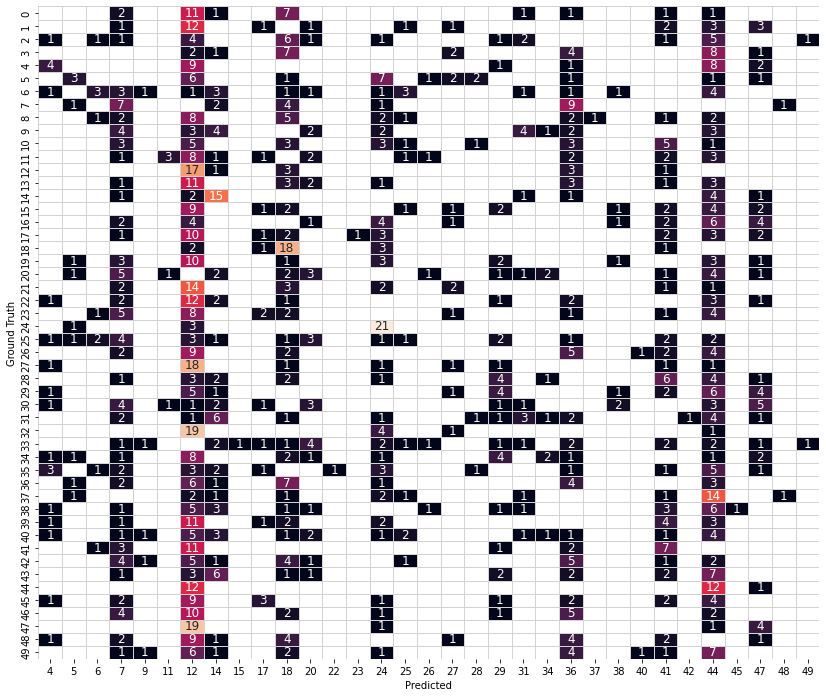

In [18]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)